# Time-resolved single-gene analyses

Simplified version of https://github.com/gittenberg/TRSL/blob/master/workbooks/analyses/06%20TRSL_time-resolved_single-gene_analyses.ipynb

## 1. Imports

In [17]:
import numpy as np
import pandas as pd
import pickle as pkl
import io
import collections

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

import sys
sys.path.append(r'../')
sys.path.append(r'../translation/')

## 2. Load data

In [2]:
filepaths = {
0: r"C:\Users\mjs\git\TRSL2\results\volume-adjusted polyphasic cell cycle v2 from 0 to 300, Teufel transcriptome, full exome, no decay, with ribo growth factor, updated initiation rates according to Shah_20211125_1317_200000_ribosomes_2100s.p"
, 300: r"C:\Users\mjs\git\TRSL2\results\volume-adjusted polyphasic cell cycle v2 from 300 to 600, Teufel transcriptome, full exome, no decay, with ribo growth factor, updated initiation rates according to Shah_20211125_1717_210769_ribosomes_2100s.p"
, 600: r"C:\Users\mjs\git\TRSL2\results\volume-adjusted polyphasic cell cycle v2 from 600 to 900, Teufel transcriptome, full exome, no decay, with ribo growth factor, updated initiation rates according to Shah_20211125_2224_221538_ribosomes_2100s.p"
, 900: r"C:\Users\mjs\git\TRSL2\results\volume-adjusted polyphasic cell cycle v2 from 900 to 1200, Teufel transcriptome, full exome, no decay, with ribo growth factor, updated initiation rates according to Shah_20211126_0335_232307_ribosomes_2100s.p"
, 1200: r"C:\Users\mjs\git\TRSL2\results\volume-adjusted polyphasic cell cycle v2 from 1200 to 1500, Teufel transcriptome, full exome, no decay, with ribo growth factor, updated initiation rates according to Shah_20211126_0850_243076_ribosomes_2100s.p"
, 1500: r"C:\Users\mjs\git\TRSL2\results\volume-adjusted polyphasic cell cycle v2 from 1500 to 1800, Teufel transcriptome, full exome, no decay, with ribo growth factor, updated initiation rates according to Shah_20211126_1213_253846_ribosomes_2100s.p"
, 1800: r"C:\Users\mjs\git\TRSL2\results\volume-adjusted polyphasic cell cycle v2 from 1800 to 2100, Teufel transcriptome, full exome, no decay, with ribo growth factor, updated initiation rates according to Shah_20211126_1536_264615_ribosomes_2100s.p"
, 2100: r"C:\Users\mjs\git\TRSL2\results\volume-adjusted polyphasic cell cycle v2 from 2100 to 2400, Teufel transcriptome, full exome, no decay, with ribo growth factor, updated initiation rates according to Shah_20211126_1902_275384_ribosomes_2100s.p"
, 2400: r"C:\Users\mjs\git\TRSL2\results\volume-adjusted polyphasic cell cycle v2 from 2400 to 2700, Teufel transcriptome, full exome, no decay, with ribo growth factor, updated initiation rates according to Shah_20211126_2227_286153_ribosomes_2100s.p"
, 2700: r"C:\Users\mjs\git\TRSL2\results\volume-adjusted polyphasic cell cycle v2 from 2700 to 3000, Teufel transcriptome, full exome, no decay, with ribo growth factor, updated initiation rates according to Shah_20211127_0156_296923_ribosomes_2100s.p"
, 3000: r"C:\Users\mjs\git\TRSL2\results\volume-adjusted polyphasic cell cycle v2 from 3000 to 3300, Teufel transcriptome, full exome, no decay, with ribo growth factor, updated initiation rates according to Shah_20211127_0437_307692_ribosomes_2100s.p"
, 3300: r"C:\Users\mjs\git\TRSL2\results\volume-adjusted polyphasic cell cycle v2 from 3300 to 3600, Teufel transcriptome, full exome, no decay, with ribo growth factor, updated initiation rates according to Shah_20211127_0823_318461_ribosomes_2100s.p"
}

In [3]:
results = {}
proteome = {}
for time in filepaths:
    print(time, end=" ")
    results[time] = pkl.load(open(filepaths[time], "rb"))
    proteome[time] = {key: results[time]['proteome'][key] for key in results[time]['proteome'] 
                     if results[time]['proteome'][key] > 1e-2}

0 300 600 900 1200 1500 1800 2100 2400 2700 3000 3300 

In [4]:
orf_genomic_dict = pkl.load(open("../parameters/orf_coding.p", "rb"))
all_genes = orf_genomic_dict.keys()

In [5]:
with open('../parameters/transcriptome_time_dependent_v2.p', "rb") as f:
    transcriptomes_dict = collections.OrderedDict(sorted(pkl.load(f).items()))

## 3. Time-resolved translation efficiencies

In [6]:
translation_rate_full = {}

for time in np.arange(0, 3600, 300):
    for gene in all_genes:
        if gene in results[time]['timecourses']:
            rate = float(results[time]['timecourses'][gene][-1]-results[time]['timecourses'][gene][-601])/600.
            translation_rate_full.setdefault(gene, []).append(rate)
        else:
            translation_rate_full.setdefault(gene, []).append(0.0)

In [7]:
translation_rate_full_df = pd.DataFrame(translation_rate_full, index=np.arange(0, 3600, 300))

In [8]:
translation_rate_full_df

,YAL008W,YBR255W,YGR164W,YGR131W,YPL144W,YBR135W,YBR160W,YJL082W,YJL142C,YPL191C,...,YNL185C,YCR067C,YGR269W,YMR147W,YCR089W,YPR117W,YHR086W,YBR015C,YPL013C,YHR083W
0,0.066667,0.006667,0.0,0.0,0.021667,0.056667,0.138333,0.053333,0.0,0.000000,...,0.020000,0.016667,0.0,0.0,0.180000,0.000000,0.020000,0.145000,0.146667,0.013333
300,0.086667,0.016667,0.0,0.0,0.000000,0.023333,0.215000,0.035000,0.0,0.000000,...,0.045000,0.036667,0.0,0.0,0.101667,0.001667,0.010000,0.161667,0.158333,0.025000
600,0.158333,0.023333,0.0,0.0,0.026667,0.041667,0.225000,0.013333,0.0,0.000000,...,0.058333,0.033333,0.0,0.0,0.070000,0.001667,0.016667,0.241667,0.285000,0.020000
900,0.170000,0.020000,0.0,0.0,0.015000,0.081667,0.178333,0.000000,0.0,0.011667,...,0.026667,0.038333,0.0,0.0,0.040000,0.000000,0.018333,0.338333,0.263333,0.011667
1200,0.071667,0.026667,0.0,0.0,0.026667,0.045000,0.155000,0.021667,0.0,0.000000,...,0.020000,0.033333,0.0,0.0,0.031667,0.000000,0.033333,0.268333,0.193333,0.040000
1500,0.095000,0.011667,0.0,0.0,0.015000,0.026667,0.068333,0.000000,0.0,0.000000,...,0.015000,0.036667,0.0,0.0,0.043333,0.000000,0.021667,0.110000,0.096667,0.035000
1800,0.041667,0.005000,0.0,0.0,0.021667,0.038333,0.056667,0.016667,0.0,0.000000,...,0.018333,0.025000,0.0,0.0,0.028333,0.001667,0.010000,0.115000,0.120000,0.015000
2100,0.058333,0.008333,0.0,0.0,0.000000,0.030000,0.031667,0.021667,0.0,0.000000,...,0.056667,0.025000,0.0,0.0,0.025000,0.000000,0.013333,0.085000,0.163333,0.030000
2400,0.048333,0.010000,0.0,0.0,0.036667,0.041667,0.090000,0.020000,0.0,0.000000,...,0.025000,0.013333,0.0,0.0,0.048333,0.000000,0.011667,0.098333,0.203333,0.045000
2700,0.048333,0.008333,0.0,0.0,0.020000,0.031667,0.030000,0.000000,0.0,0.000000,...,0.060000,0.028333,0.0,0.0,0.011667,0.000000,0.010000,0.111667,0.143333,0.013333


In [9]:
transcriptomes_df = pd.DataFrame(transcriptomes_dict).transpose().set_index(np.arange(0, 3601, 300))

In [10]:
transcriptomes_df

,YAL001C,YAL002W,YAL003W,YAL004W,YAL005C,YAL007C,YAL008W,YAL009W,YAL010C,YAL011W,...,YIL014C-A,YIL002W-A,YIR017W-A,YIR018C-A,YIR020W-A,YIR020C-B,YIR021W-A,YIR023C-A,YIR030W-A,YIR036W-A
0,1,2,53,0,79,2,2,3,1,1,...,2,17,0,1,0,0,0,0,0,0
300,2,0,42,0,71,3,2,1,0,1,...,3,19,0,2,0,0,1,0,0,0
600,2,2,83,0,107,11,6,3,0,2,...,3,35,0,1,0,0,0,0,1,0
900,2,2,89,0,81,9,5,3,1,3,...,5,33,0,1,0,0,1,0,0,0
1200,2,2,88,0,86,8,3,4,1,2,...,4,34,0,1,0,0,2,0,0,0
1500,1,1,38,0,31,3,2,2,0,0,...,1,11,0,1,0,0,0,0,0,0
1800,1,1,38,0,35,3,1,2,0,1,...,2,13,0,0,0,0,0,0,0,0
2100,0,1,39,0,37,3,1,1,0,1,...,1,11,0,0,0,0,1,0,0,0
2400,1,1,27,0,41,2,1,3,0,0,...,3,11,0,0,0,0,0,0,0,0
2700,1,1,47,0,34,1,1,1,0,1,...,2,10,0,1,0,0,0,0,0,0


In [11]:
te = translation_rate_full_df.div(transcriptomes_df)

In [12]:
te = te.dropna(axis=0, how='all').dropna(axis=1, how='all')

In [13]:
te

,YAL001C,YAL002W,YAL003W,YAL005C,YAL007C,YAL008W,YAL009W,YAL010C,YAL011W,YAL012W,...,YPR187W,YPR188C,YPR189W,YPR190C,YPR191W,YPR194C,YPR196W,YPR198W,YPR199C,YPR200C
0,0.013333,0.006667,0.070409,0.0,0.029167,0.033333,0.010000,0.011667,0.013333,0.051045,...,0.033929,0.023889,0.011667,0.016111,0.026667,NaN,NaN,NaN,0.001667,NaN
300,0.012500,NaN,0.069484,0.0,0.018333,0.043333,0.015000,NaN,0.010000,0.052896,...,0.029545,0.022222,0.018333,0.014167,0.027500,NaN,NaN,0.018333,0.008333,0.0
600,0.008333,0.004167,0.054498,0.0,0.017727,0.026389,0.006667,NaN,0.011667,0.040369,...,0.023406,0.016667,0.013333,0.015417,0.018333,NaN,NaN,0.015833,NaN,0.0
900,0.008333,0.002500,0.054663,0.0,0.021481,0.034000,0.008889,0.006667,0.006111,0.040714,...,0.024697,0.017292,0.011250,0.011667,0.013333,NaN,0.0,0.008333,0.005000,NaN
1200,0.005833,0.004167,0.054792,0.0,0.017708,0.023889,0.007500,0.013333,0.011667,0.042439,...,0.023333,0.018333,0.009167,0.011250,0.016111,0.0,NaN,0.013333,0.003333,0.0
1500,0.010000,0.006667,0.085746,0.0,0.034444,0.047500,0.015000,NaN,NaN,0.060376,...,0.036042,0.023333,0.023333,0.026667,0.018333,NaN,NaN,0.023333,0.015000,NaN
1800,0.015000,0.006667,0.083640,0.0,0.023889,0.041667,0.011667,NaN,0.015000,0.058952,...,0.036667,0.035000,0.021667,0.025000,0.035000,NaN,NaN,0.015000,0.011667,NaN
2100,NaN,0.008333,0.085128,0.0,0.038333,0.058333,0.015000,NaN,0.013333,0.062451,...,0.039583,0.026667,0.021667,0.015000,0.030000,NaN,NaN,0.021667,NaN,NaN
2400,0.013333,0.008333,0.082963,0.0,0.032500,0.048333,0.011111,NaN,NaN,0.061919,...,0.039697,0.025000,0.017500,0.023333,0.025000,NaN,NaN,0.015000,0.010000,NaN
2700,0.010000,0.005000,0.083191,0.0,0.031667,0.048333,0.011667,NaN,0.025000,0.060244,...,0.041364,0.022500,0.025000,0.014167,0.026667,NaN,NaN,0.015000,0.005000,NaN


In [14]:
pkl.dump(te.transpose(), open("../parameters/te_time-resolved.p", "wb"))

In [28]:
genes_shortlist = {'HHF1': 'YBR009C', 'HHF2': 'YNL030W', 'HHT1': 'YBR010W', 'HHT2': 'YNL031C', 'HTB1': 'YDR224C', 
                   'HTB2': 'YBL002W', # 'PMA1': 'YGL008C', 
                   # 'RNR1': 'YER070W', 'RNR2': 'YJL026W', 'RNR3': 'YIL066C', 'RNR4': 'YGR180C', 
                   # genes suggested by Katja, some histones
                   'HTA1': 'YDR225W',
                   'HTA2': 'YBL003C',
                   'SIC1': 'YLR079W', 'CLN2': 'YPL256C', 'CLB2': 'YPR119W', 'CLB5': 'YPR120C', 
                   'PCL1': 'YNL289W', 'PCL9': 'YDL179W', 'SWE1': 'YJL187C'} # FISH genes

In [29]:
translation_rate_shortlist = {}

for (genecommon, gene) in genes_shortlist.items():
    translation_rate_shortlist[genecommon] = []
    for time in np.arange(0, 3600, 300):
        if gene in results[time]['timecourses']:
            rate = float(results[time]['timecourses'][gene][-1]-results[time]['timecourses'][gene][-601])/600.
        else:
            rate = 0.
        translation_rate_shortlist[genecommon].append(rate)

In [30]:
translation_ratedf = pd.DataFrame(translation_rate_shortlist, index=np.arange(0, 3600, 300))

In [31]:
transcriptomes_short_df = transcriptomes_df[genes_shortlist.values()]
transcriptomes_short_df.columns = genes_shortlist.keys()

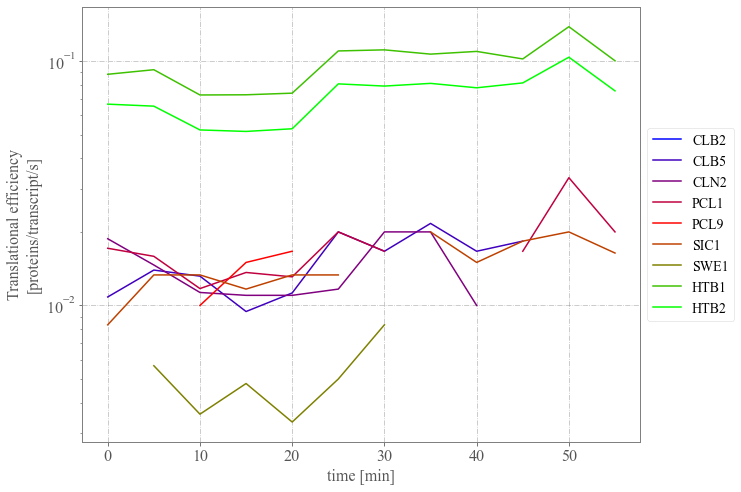

In [39]:
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'grey'
plt.rcParams['grid.color'] = 'grey'
plt.rcParams['grid.alpha'] = '0.5'
plt.rcParams['grid.linestyle'] = '-.'
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.sans-serif'] = 'Times New Roman'

plt.rcParams['figure.figsize'] = (10, 8)

ratio = translation_ratedf.div(transcriptomes_short_df)[['CLB2', 'CLB5', 'CLN2', 'PCL1', 'PCL9', 'SIC1', 'SWE1', 
                                                         #'HHF1', 'HHF2', 'HHT1', 'HHT2', 
                                                         #'HTA1', 'HTA2'
                                                         #,
                                                         'HTB1', 'HTB2'
                                                         ]]
ratio.set_index(np.arange(0, 61, 5), inplace=True)
# ax = ratio.plot(logy=True, ylim=[1e-3, 5e-1], colormap='brg')
ax = ratio.plot(logy=True, colormap='brg')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
ax.set_xlabel("time [min]", fontsize=16)
ax.set_ylabel("Translational efficiency\n[proteins/transcript/s]", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.savefig('time_resolved_single_gene_results.pdf', bbox_inches='tight')